### Inital Setup

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
time_df  = pd.read_csv("airline-passenger-traffic.csv", header = None)
time_df.columns = ["Month", "Passengers"]
time_df["Month"] = pd.to_datetime(time_df["Month"], format = "%Y-%m")
time_df = time_df.set_index("Month")
time_df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Time series Analysis

### Plot Time Series Data

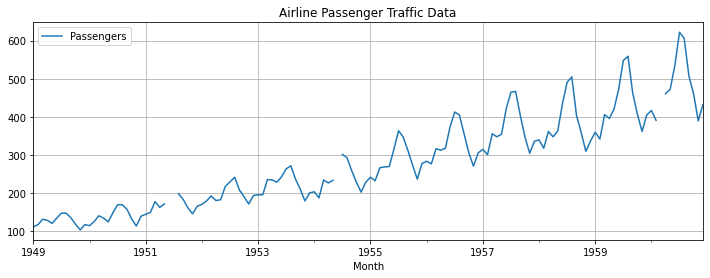

In [3]:
time_df.plot(figsize = (12,4))
plt.legend(loc= "best")
plt.title("Airline Passenger Traffic Data")
plt.grid()
plt.show(block = False)

### Missing Values Treatment Methods

### Mean Imputaion

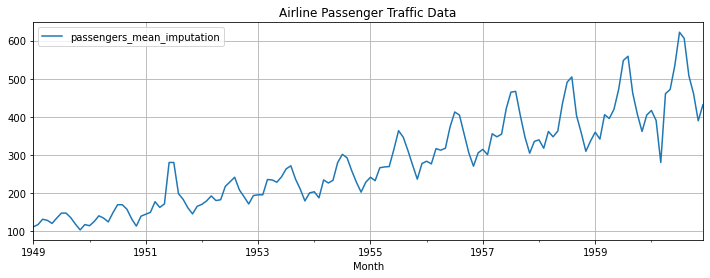

In [4]:
time_df= time_df.assign(passengers_mean_imputation = time_df.Passengers.fillna(time_df.Passengers.mean()))
time_df[["passengers_mean_imputation"]].plot(figsize = (12,4))
plt.legend(loc= "best")
plt.title("Airline Passenger Traffic Data")
plt.grid()
plt.show(block = False)

### Linear Interpolation

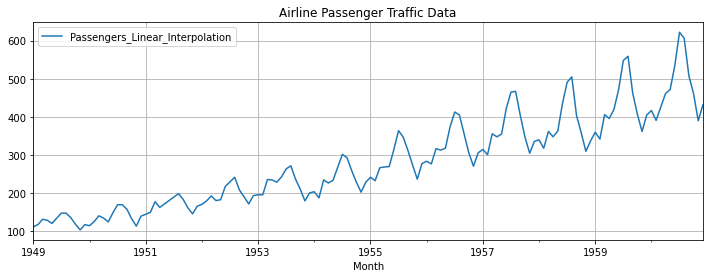

In [5]:
time_df = time_df.assign(Passengers_Linear_Interpolation = time_df.Passengers.interpolate(method = "linear"))
time_df[["Passengers_Linear_Interpolation"]].plot(figsize = (12,4))
plt.legend(loc= "best")
plt.title("Airline Passenger Traffic Data")
plt.grid()
plt.show(block = False)

In [6]:
time_df["Passengers"] = time_df["Passengers_Linear_Interpolation"]

### Outlier Detection

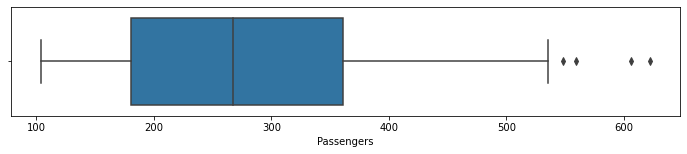

In [7]:
# By using Box plot

fig  = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = time_df["Passengers"], whis = 1)
plt.show()

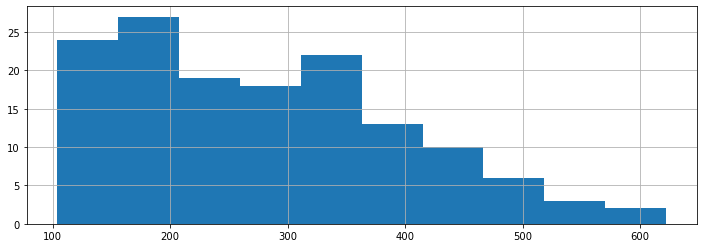

In [8]:
# By using Histogram

fig = time_df.Passengers.hist(figsize = (12,4))

There is no outliers in dataset

### Time Series Decomposition

#### Additive Decomposition

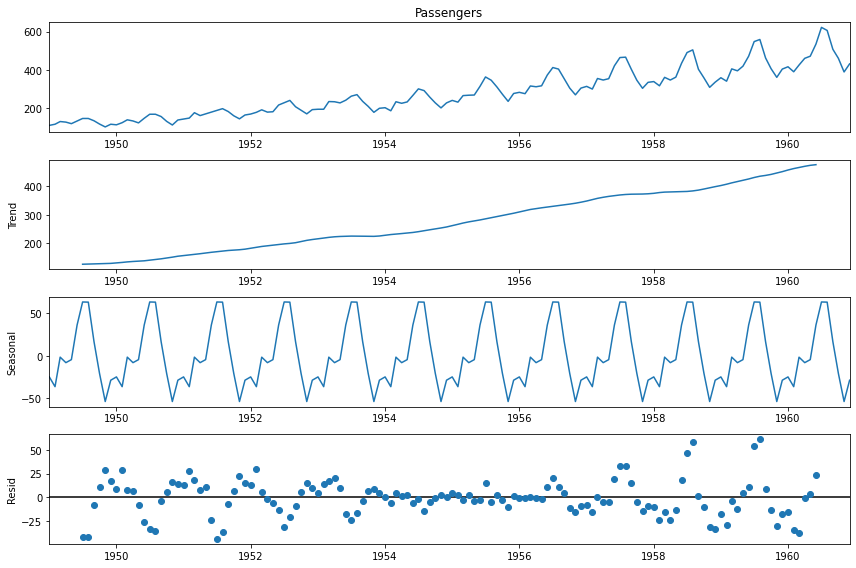

In [9]:
from pylab import rcParams
import statsmodels.api as sm
rcParams["figure.figsize"] = 12,8
decomposition = sm.tsa.seasonal_decompose(time_df.Passengers, model = "additive")
fig =decomposition.plot()

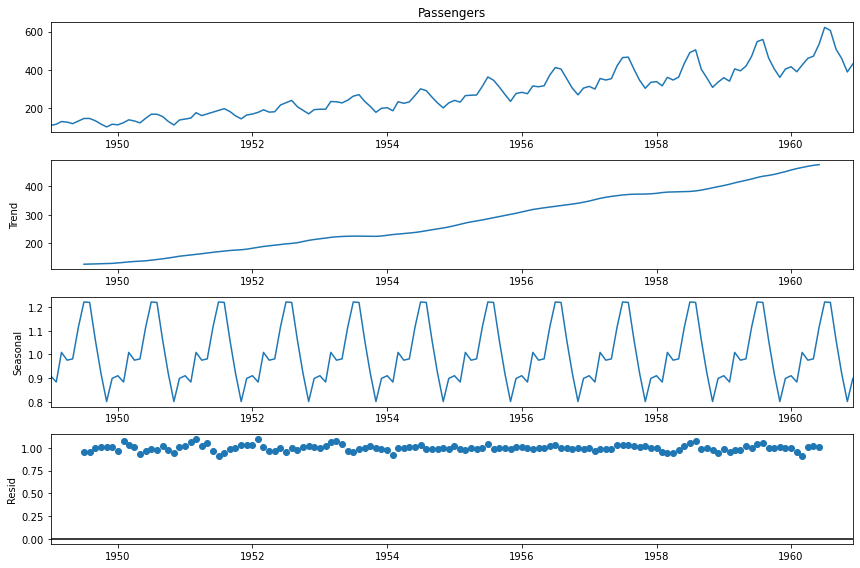

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams["figure.figsize"] = 12,8
decomposition = sm.tsa.seasonal_decompose(time_df.Passengers, model = "multiplicative")
fig =decomposition.plot()

### Build & Evalute Time Series Data

#### Splitting Dataset Into Train & Test Dataset

In [11]:
train_len = 120
train = time_df[:train_len]

test = time_df[train_len:]

### Naive Method Forecasting

In [12]:
y_naive = test.copy()
y_naive['naive_forecast'] = train["Passengers"][train_len-1]

### Plot Train, Test & Forecast

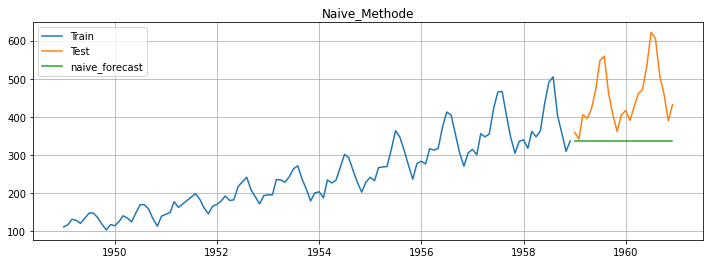

In [13]:
plt.figure(figsize = (12, 4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_naive["naive_forecast"], label = "naive_forecast")
plt.legend(loc = "best")
plt.title("Naive_Methode")
plt.grid()
plt.show()

### Calculate RMSE & MAPE To Evaluate Forecast

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_naive["naive_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"] - y_naive["naive_forecast"]) / test["Passengers"]))

results = pd.DataFrame({"method":["naive_method"], "mape":[mape], "rmse":[rmse]})
results = results[["method", "mape", "rmse"]]
results

,method,mape,rmse
0,naive_method,0.0,137.51


### Simaple Moving Average Method

In [15]:
y_avg = test.copy()
y_avg["avg_forecast"] = train["Passengers"].mean()

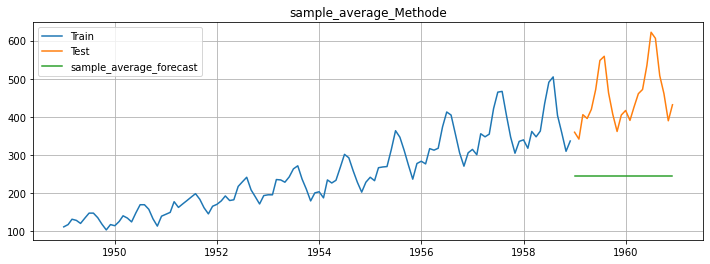

In [16]:
plt.figure(figsize = (12, 4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_avg["avg_forecast"], label = "sample_average_forecast")
plt.legend(loc = "best")
plt.title("sample_average_Methode")
plt.grid()
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_avg["avg_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"] - y_avg["avg_forecast"]) / test["Passengers"]))

results1 = pd.DataFrame({"method":["avg_forecast_method"], "mape":[mape], "rmse":[rmse]})
results1 = results1[["method", "mape", "rmse"]]
results = pd.concat([results, results1], axis = 0)
results

,method,mape,rmse
0,naive_method,0.0,137.51
0,avg_forecast_method,0.0,219.69


In [18]:
y_sma =time_df.copy()
ma_window = 12
y_sma["sma_forecast"] = time_df["Passengers"].rolling(ma_window).mean()
y_sma["sma_forecast"][train_len:] = y_sma['sma_forecast'][train_len-1]

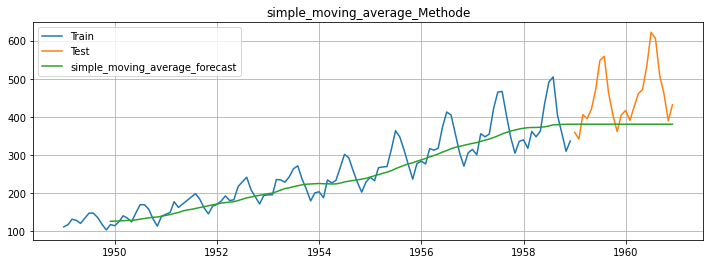

In [19]:
plt.figure(figsize = (12, 4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_sma["sma_forecast"], label = "simple_moving_average_forecast")
plt.legend(loc = "best")
plt.title("simple_moving_average_Methode")
plt.grid()
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"] - y_sma["sma_forecast"][train_len:]) / test["Passengers"]))

results2 = pd.DataFrame({"method":["simple_moving_average_Methode"], "mape":[mape], "rmse":[rmse]})
results2 = results2[["method", "mape", "rmse"]]
results = pd.concat([results, results2], axis = 0)
results

,method,mape,rmse
0,naive_method,0.0,137.51
0,avg_forecast_method,0.0,219.69
0,simple_moving_average_Methode,0.0,103.33
